In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

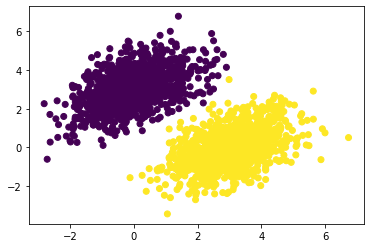

In [2]:
# generating synthetic data

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack(
    (
        np.zeros((num_samples_per_class, 1), dtype="float32"),
        np.ones((num_samples_per_class, 1), dtype="float32")
    )
)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [9]:
input_dim = 2
output_dim = 1
W = tf.Variable(
    tf.random.uniform((input_dim, output_dim))
)

b = tf.Variable(
    tf.zeros((output_dim,))
)

In [4]:
def model(inputs):
    """
    Forward pass.

    For 2 features,
        equation of line: w1x + w2y + b = 0.5
        class 0: w1x + w2y + b < 0.5 (below the line)
        class 1: w1x + w2y + b > 0.5 (above the line)
    """

    return tf.matmul(inputs, W) + b

In [5]:
def square_loss(y_true, y_pred):
    """
    Calculate mean squared error.
    """

    per_sample_losses = tf.square(y_true - y_pred)
    return tf.reduce_mean(per_sample_losses)

In [6]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)

    dW, db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)
    return loss

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}) {loss}")

0) 3.036695718765259
1) 0.46510085463523865
2) 0.16940563917160034
3) 0.12546700239181519
4) 0.1131213828921318
5) 0.10524331778287888
6) 0.09844834357500076
7) 0.09227551519870758
8) 0.08662707358598709
9) 0.08145344257354736
10) 0.07671408355236053
11) 0.07237246632575989
12) 0.06839519739151001
13) 0.06475171446800232
14) 0.06141398474574089
15) 0.05835635960102081
16) 0.05555533617734909
17) 0.05298937112092972
18) 0.050638746470212936
19) 0.048485394567251205
20) 0.04651274159550667
21) 0.04470563679933548
22) 0.043050188571214676
23) 0.041533663868904114
24) 0.040144409984350204
25) 0.03887174278497696
26) 0.03770587965846062
27) 0.03663785383105278
28) 0.03565945476293564
29) 0.034763168543577194
30) 0.033942095935344696
31) 0.03318992629647255
32) 0.03250088542699814
33) 0.031869664788246155
34) 0.0312914177775383
35) 0.03076169639825821
36) 0.030276430770754814
37) 0.029831888154149055
38) 0.029424652457237244
39) 0.029051590710878372


In [13]:
predictions = model(inputs)

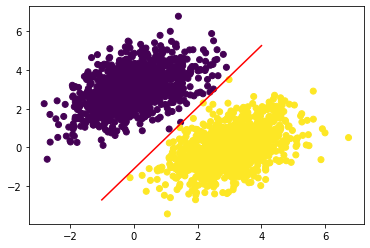

In [14]:
x = np.linspace(-1, 4, 100)
y = (-W[0] * x + 0.5 - b) / W[1]

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

### Why `y = (-W[0] * x + 0.5 - b) / W[1]`?

<pre>
   w1x + w2y + b = 0.5
=> y = (-w1x + 0.5 - b) / w2
</pre>